# Lab 2

## Regression Analysis

### Introduction

Эта лабораторная работа познакомит вас с проблемами регрессии и способами их решения. Кроме того, вы узнаете, как подготовить набор данных для создания модели машинного обучения.

### Objectives

- Исследование данных
- Подготовка данных
- Реализация алгоритма линейной регрессии
- Кодирование категориальных данных (преобразование категориальных данных в числовые)
- Масштабирование данных
- Реализация алгоритма полиномиальной регрессии
- Множественная линейная регрессия


### Regression
1. Что такое регрессия?
2. Почему нам нужно исследовать данные именно для регрессии?
3. Какие методы мы обычно используем для подготовки данных?
3. Когда нам нужна регрессия?


### Linear Regression
1. Что такое регрессия?
</span>

####  В этой задаче регрессии мы будем предсказывать процент оценок, которые должен набрать студент в зависимости от количества часов, которые он проучился. Это простая задача линейной регрессии, поскольку в ней задействована всего одна объясняющая переменная.

#### Import the libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data and explore the data

In [ ]:
dataset = pd.read_csv('res/student_scores.csv')
dataset.shape

(25, 2)

In [ ]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Data Plotting:
Нанесите точки данных на двумерный график, чтобы посмотреть на наш набор данных и выяснить, можем ли мы вручную найти какую-либо взаимосвязь между данными:

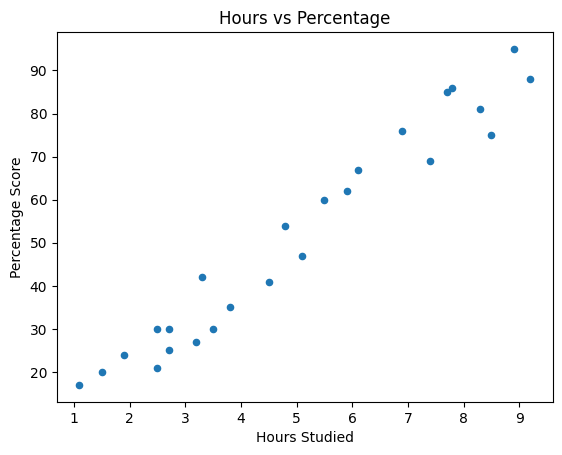

In [ ]:
dataset.plot(x='Hours', y='Scores', kind="scatter")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Splitting data into train / test sets

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)
# Write one line below to split the dataset into train / test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


#### Build Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Train the model on the X_train and y_train, write one line below
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


#### Evaluate the performance of the linear regression model on test dataset

In [ ]:
# let's get predictions of the X_test by our model, assign the result into y_pre value, write one line below
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Task: Измерьте эффективность модели с помощью среднеквадратичной ошибки, средней абсолютной ошибки и коэффициента детерминации $R^2$.

Recall the formulas of the MAE:

![MAE formula](res/mae_formula.png "MAE formula")

MSE:

![MSE formula](res/mse_formula.png "MSE formula")

MSE:

![RMSE formula](res/rmse.png "RMSE formula")



Q: What RMSE, MSE and R-squared tell us?

<span style="color:blue">
Вкратце, MAE оценивает абсолютное расстояние между наблюдениями (записями набора данных) и предсказаниями регрессии, принимая среднее значение по всем наблюдениям. Мы используем абсолютное значение расстояний, чтобы правильно учесть отрицательные ошибки. </span>

<span style="color:blue">Другой способ сделать это - возвести расстояние в квадрат, чтобы результаты были положительными. Для этого используется показатель MSE, причем большие ошибки (или расстояния) имеют больший вес в метрике, чем меньшие, что обусловлено природой функции мощности. </span>


<span style="color:blue"> Обратной стороной MSE является тот факт, что единицы измерения также возводятся в квадрат, поэтому если модель пытается предсказать цену US, MSE даст число с единицей измерения (US)² что не имеет смысла. RMSE используется для того, чтобы вернуть ошибку MSE к исходной единице путем извлечения квадратного корня из нее, сохраняя при этом свойство штрафовать более высокие ошибки</span>


<span style="color:blue">
И RMSE, и MSE говорят нам о том, насколько в среднем наши предсказания будут далеки от истины.
$R^2$ показывает, какая часть дисперсии/вариации(variance/variability) в Y была объяснена моделью через объясняющие переменные. </span>

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


## Encoding Categorical Data (Converting categorical data to numbers)

Существует два распространенных подхода к преобразованию порядковых и категориальных переменных в числовые значения. К ним относятся:

- Ordinal Encoding
- One-Hot Encoding

### Ordinal Encoding

При порядковом кодировании каждому уникальному значению категории присваивается целочисленное значение.

Например, "красный" - это 1, "зеленый" - 2, а "синий" - 3.

Это называется порядковым или целочисленным кодированием и легко обратимо. Часто используются целочисленные значения, начинающиеся с нуля.

In [ ]:
# example of a ordinal encoding
from numpy import asarray
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


Преобразуем приведенные выше категориальные данные в числовые с помощью метода Ordinal Encoder:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
encoder = OrdinalEncoder()

# todo: write one line code below to transform categorical data into numerical via OrdinalEncoder
result = encoder.fit_transform(data)

print(result)

[[2.]
 [1.]
 [0.]]


1. Когда следует использовать OrdinalEncoding? <span style="color:blue"> Целочисленные значения имеют естественную упорядоченную связь между собой, и алгоритмы машинного обучения могут понять и использовать эту связь.

2. Когда не следует использовать OrdinalEncoding? Каковы его недостатки? <span style="color:blue"> Для категориальных переменных, где нет порядковых отношений, целочисленное кодирование может быть в лучшем случае недостаточным, а в худшем - ввести модель в заблуждение. Форсирование порядковых отношений с помощью порядкового кодирования и предоставление модели возможности предположить естественное упорядочивание между категориями может привести к низкой производительности или неожиданным результатам (предсказания на полпути между категориями).

### One-Hot Encoding

" Каждый бит представляет собой возможную категорию. Если переменная не может принадлежать сразу к нескольким категориям, то только один бит в группе может быть "включен". Это называется однобитовым кодированием ... " - Страница 78, Feature Engineering for Machine Learning, 2018.

Мы можем продемонстрировать использование OneHotEncoder на цветовых категориях. Сначала категории сортируются, в данном случае в алфавитном порядке, поскольку они являются строками, затем для каждой категории по очереди создаются двоичные переменные. Это означает, что синий цвет будет представлен как [1, 0, 0] с "1" в первой двоичной переменной, затем зеленый и, наконец, красный.

In [ ]:
# example of a one hot encoding
from numpy import asarray
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

[['red']
 ['green']
 ['blue']]


Преобразуем приведенные выше категориальные данные в числовые с помощью метода One-Hot Encoder:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# todo: write one line code below to transform categorical data into numerical via OneHotEncoder
onehot = encoder.fit_transform(data)
print(onehot)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Data Scaling

Алгоритм машинного обучения просто видит число - если есть большая разница в диапазоне, скажем, несколько чисел в тысячах и несколько чисел в десятках, он делает предположение, что числа с более высоким диапазоном имеют какое-то превосходство. Таким образом, эти более значимые числа начинают играть более решающую роль при обучении модели.

Алгоритм машинного обучения работает с числами и не знает, что представляют собой эти числа. Вес в 10 граммов и цена в 10 долларов представляют собой совершенно две разные вещи - для человека это не имеет никакого значения, но для модели, как для характеристики, оба показателя рассматриваются как одно и то же.

Предположим, у нас есть две характеристики - вес и цена, как в таблице ниже. Вес" не может иметь значимого сравнения с "ценой". Поэтому алгоритм делает предположение, что раз "Вес" > "Цена", то "Вес" важнее "Цены".

![Fruit weight price example](res/fruit_weight_price.png "Fruit example")


Таким образом, эти более значимые числа начинают играть решающую роль при обучении модели. Таким образом, масштабирование признаков необходимо для того, чтобы поставить каждый признак в равные условия, не придавая ему особого значения. Интересно, что если перевести вес в "кг", то "цена" становится доминирующей.

Еще одна причина, по которой применяется масштабирование признаков, заключается в том, что некоторые алгоритмы, например градиентный спуск нейронной сети, сходятся гораздо быстрее с масштабированием признаков, чем без него.

![Converge example](res/converge_example.png "Converge example")

### Data scaling technique: Data normalization
Нормализация - это изменение масштаба данных по сравнению с исходным диапазоном таким образом, чтобы все значения находились в диапазоне 0 и 1 (или других диапазонах).

Нормализация требует, чтобы вы знали или могли точно оценить минимальное и максимальное наблюдаемые значения. Возможно, вы сможете оценить эти значения по имеющимся у вас данным.

Формула для нормализации:

$x^{(i)}_{normalized} = (x^{(i)} - min(X)) / (max(X) - min(X))$, where $X = [x_0, x_1, ... x_i, ... x_n]$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


Let's apply the min-max scaler, or normalization to the above dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# todo: apply min-max scaler to the df dataset, write one line code below
min_max_scaled_data = scaler.fit_transform(df)

df1 = pd.DataFrame(min_max_scaled_data, columns=['WEIGHT','PRICE'], index = ['Orange','Apple','Banana','Grape'])
print(df1)

        WEIGHT  PRICE
Orange   0.625   0.00
Apple    1.000   0.50
Banana   0.250   0.25
Grape    0.000   1.00


### Data scaling technique: Data Standardization

Стандартизация набора данных предполагает изменение распределения значений таким образом, чтобы среднее значение наблюдаемых величин было равно 0, а стандартное отклонение - 1. Иногда это называют "отбеливанием".

Это можно представить как вычитание среднего значения или центрирование данных.

Как и нормализация, стандартизация может быть полезна и даже необходима в некоторых алгоритмах машинного обучения, когда ваши данные содержат входные значения с разными шкалами.

Стандартизация предполагает, что ваши наблюдения соответствуют гауссову распределению (колоколообразной кривой) с хорошо выраженными средним и стандартным отклонением. Вы можете стандартизировать данные, если это предположение не выполняется, но при этом вы можете получить ненадежные результаты.

Стандартизация требует, чтобы вы знали или могли точно оценить среднее и стандартное отклонение наблюдаемых величин. Возможно, вы сможете оценить эти значения на основе ваших учебных данных.

The formula is:

$y = \frac{(x - mean)} {standard\_deviation}$

where:
- $mean = \frac{sum(x)}{count(x)}$
- $standard\_deviation = \sqrt{\frac{\sum (x - mean)^2}{count(x)}}$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


Let's apply the standard scaler to the above dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# todo: apply standard scaler to the df dataset, write one line code below
scaled_df = scaler.fit_transform(df)
df2 = pd.DataFrame(scaled_df,
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
print(df2)

          WEIGHT     PRICE
Orange  0.412393 -1.183216
Apple   1.402136  0.169031
Banana -0.577350 -0.507093
Grape  -1.237179  1.521278


Data standardization vs normalization, which one to use?


![Feature scaling, standartization vs Max min](res/f_scaling_stand_vs_max_min.png "Feature scaling, standartization vs Max min")

![Feature scaling](res/f_scaling_c_age.png "Feature scaling")

![Feature scaling](res/f_scaling_c_salary.png "Feature scaling")

<span style="color:blue">
Из приведенных выше графиков видно, что применение Max-Min Nomaralisation в нашем наборе данных дало меньшие стандартные отклонения (зарплата и возраст), чем использование метода Standardisation. Это означает, что данные более сконцентрированы вокруг среднего значения, если мы масштабируем данные с помощью Max-Min Nomaralisation.

В результате, если в вашем признаке (столбце) есть провалы, нормализация данных приведет к тому, что большая часть данных будет масштабирована в небольшой интервал, что означает, что все признаки будут иметь одинаковый масштаб, но это не очень хорошо справляется с провалами. Стандартизация более устойчива к провалам, и во многих случаях она предпочтительнее нормализации Max-Min.

see this article for more information: https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html
</span>

### Polynomial Regression
Polynomial Regression, это просто преобразование объясняющих переменных в полиномы более высоких порядков с интерактивными переменными.
1. Why do we need it?
<span style="color:blue"> Одно из основных предположений LR - "линейность": связь между X и y линейна. Если это предположение не выполняется, необходимо преобразовать X, чтобы приблизить его к линейному.
1. Which order of the polynomial should we choose?
<span style="color:blue"> Очевидно, что чем выше порядок полинома, тем выше сложность модели. Это верно как с вычислительной, так и с концептуальной точки зрения, поскольку в обоих случаях мы имеем большее количество адаптируемых параметров. Чем выше сложность модели, тем большую дисперсию она может отразить. Выбор порядка модели зависит от компромисса между дисперсией и дисбалансом модели. </span>
2. Should we always pick the most complex model?
<span style="color:blue"> No: Мы должны найти баланс между дисперсией и (индуктивной) предвзятостью: наша модель должна быть достаточно сложной, чтобы моделировать связь между предикторами и реакцией, но при этом она должна обладать способностью к обобщению на новые, невиданные случаи. </span>

#### Мы создадим синтетический набор данных, добавив к косинусоидальной функции случайный гауссовый шум.
#### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### Create sinusoidal function

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

#### Create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function

In [ ]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
print(X)
print(y)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


#### Мы построим три полиномиальные модели со степенями [1, 4, 15] и проследим, как увеличение степени компилятивности модели влияет на то, насколько хорошо она подходит для данных.


Task: Напишите конвейер преобразования PolynomialFeatures, затем режим LinearRegression для применения к X & y.
Затем получите оценки кросс-валидации с соответствующим аргументом скоринга при k = 10.

Q: What's your observation?
<span style="color:blue">Первая модель со степенью 1 линейна, очень проста и быстро вычисляется, но она страдает от недостаточной подгонки, поскольку не подходит ни для обучающих, ни для тестовых наборов данных. Вторая модель со степенью 4 выглядит подходящей для данных. Третья модель со степенью 15 слишком сильно подходит к обучающему набору данных и страдает от недостаточной подгонки.

[[0.0202184 ]
 [0.07103606]
 [0.0871293 ]
 [0.11827443]
 [0.14335329]
 [0.38344152]
 [0.41466194]
 [0.4236548 ]
 [0.43758721]
 [0.46147936]
 [0.52184832]
 [0.52889492]
 [0.54488318]
 [0.5488135 ]
 [0.56804456]
 [0.60276338]
 [0.63992102]
 [0.64589411]
 [0.71518937]
 [0.77815675]
 [0.78052918]
 [0.79172504]
 [0.79915856]
 [0.83261985]
 [0.87001215]
 [0.891773  ]
 [0.92559664]
 [0.94466892]
 [0.96366276]
 [0.97861834]]
[[0.0202184 ]
 [0.07103606]
 [0.0871293 ]
 [0.11827443]
 [0.14335329]
 [0.38344152]
 [0.41466194]
 [0.4236548 ]
 [0.43758721]
 [0.46147936]
 [0.52184832]
 [0.52889492]
 [0.54488318]
 [0.5488135 ]
 [0.56804456]
 [0.60276338]
 [0.63992102]
 [0.64589411]
 [0.71518937]
 [0.77815675]
 [0.78052918]
 [0.79172504]
 [0.79915856]
 [0.83261985]
 [0.87001215]
 [0.891773  ]
 [0.92559664]
 [0.94466892]
 [0.96366276]
 [0.97861834]]
[[0.0202184 ]
 [0.07103606]
 [0.0871293 ]
 [0.11827443]
 [0.14335329]
 [0.38344152]
 [0.41466194]
 [0.4236548 ]
 [0.43758721]
 [0.46147936]
 [0.52184832]
 [0.

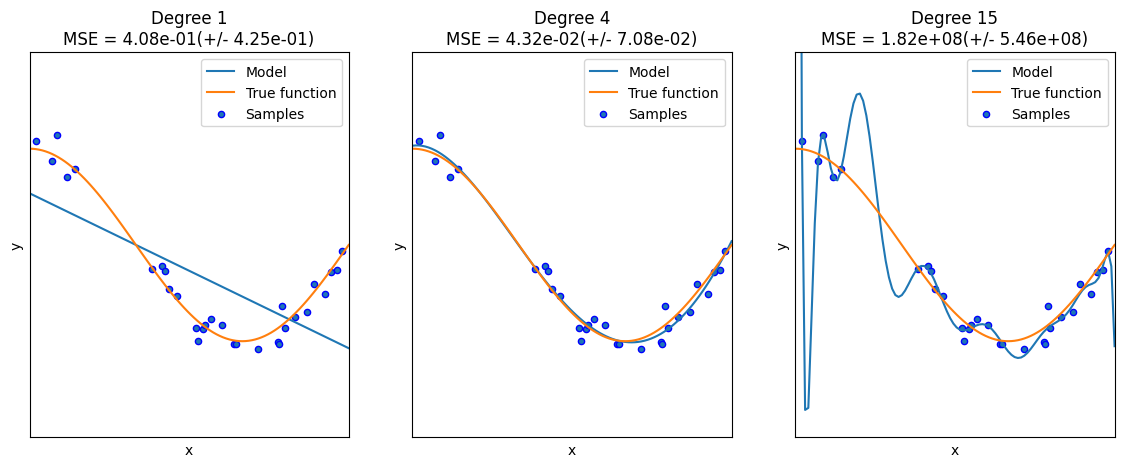

In [ ]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    print(X[:, np.newaxis])

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## Multiple linear regression

When should we use multiple linear regression? <span style="color:blue"> Когда у нас есть несколько признаков, влияющих на результат, мы используем множественную линейную регрессию, чтобы учесть несколько признаков.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math

#### Dataset

As dataset, we will use the following dataset:
https://www.kaggle.com/mohansacharya/graduate-admissions
Мы уже загрузили CSV набора данных (Admission_Predict.csv) и просто загружаем его через pandas:

In [17]:
df = pd.read_csv('res/Admission_Predict.csv')

Let's get familiar with the dataet.

In [18]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Now let's understand the format of the dataset, i.e. datatypes etc.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Для большего удобства работы с набором данных преобразуем его из pandas dataframe в numpy array. Также необходимо выбрать float в качестве формата данных для всех столбцов.



Извлечем из набора данных переменную признака (X) и переменную метки (Y):

In [20]:
cols = [0,8]
X = df.drop(df.columns[cols],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


Let's explore the dataset with Seaborn.

First, let's see how the range of the columns' values differ from each other

<AxesSubplot:>

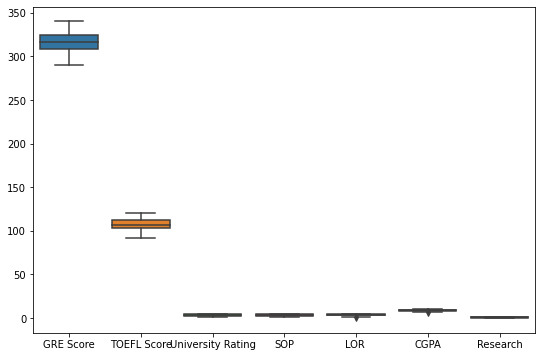

In [ ]:
# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=X)

Как мы видим, столбцы GRE Score и TOEFL имеют большие значения по сравнению с другими столбцами. Это может оказать негативное влияние на нашу модель, так как большие значения будут сильнее влиять на процесс обучения.

Поэтому нам необходимо применить нормализацию.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_ = ['GRE Score','TOEFL Score', 'University Rating','SOP','LOR','CGPA','Research']

# todo: apply min-max scaler to the df dataset, write one line code below
X = scaler.fit_transform(X)

X = pd.DataFrame(X, columns=columns_)
print(X.head())

   GRE Score  TOEFL Score  University Rating    SOP    LOR      CGPA  Research
0       0.94     0.928571               0.75  0.875  0.875  0.913462       1.0
1       0.68     0.535714               0.75  0.750  0.875  0.663462       1.0
2       0.52     0.428571               0.50  0.500  0.625  0.384615       1.0
3       0.64     0.642857               0.50  0.625  0.375  0.599359       1.0
4       0.48     0.392857               0.25  0.250  0.500  0.451923       0.0


In [23]:
Y = df.iloc[:, [8]]
Y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


Split X and Y into training and test sets

In [24]:
from sklearn.model_selection import train_test_split

# write one line code to split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [25]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,0.64,0.642857,0.5,0.625,0.375,0.599359,1.0
18,0.56,0.642857,0.5,0.750,0.500,0.641026,0.0
202,1.00,1.000000,1.0,0.875,0.875,0.996795,1.0
250,0.60,0.428571,0.5,0.500,0.375,0.567308,1.0
274,0.50,0.285714,0.0,0.250,0.375,0.368590,0.0


In [26]:
X_train.shape

(320, 7)

Now, let's instantinate the linear regression model and start the training process:

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# write one line code to train the model on the train set

model.fit(X_train, Y_train)

LinearRegression()

In [28]:
intercept = model.intercept_
print(intercept)
coefficients = model.coef_
print(coefficients)

[0.3630785]
[[ 0.09312548  0.07626324  0.0295098  -0.00117097  0.06308097  0.35776778
   0.02222705]]


Now let's predict the test dataset:

In [29]:
# write one line code to predect the test dataset by the model
Y_pred = model.predict(X_test)

Now we will create a dataframe to compare the predicted and actual labels (Y_test)

In [30]:
Y_pred = np.squeeze(Y_pred)

Y_test = np.squeeze(Y_test)

df_ = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

In [31]:
df_.head()

,Actual,Predicted
209,0.68,0.651174
280,0.68,0.723687
33,0.90,0.935368
210,0.79,0.821643
93,0.44,0.581587


In [32]:
from sklearn import metrics

# write three lines of code to calculate the MAE, MSE and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.04795673362091198
Mean Squared Error: 0.004617003377285013
Root Mean Squared Error: 0.0679485347692282


## References:
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
- https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
- https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html